# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №2. Кластерный анализ. </center>

## Задание 1

В данном задании вам необходимо реализовать алгоритм кластеризации [Partition Around Medoids](http://algowiki-project.org/ru/%D0%A3%D1%87%D0%B0%D1%81%D1%82%D0%BD%D0%B8%D0%BA:Denemmy/Partitioning_Around_Medoids_%28%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%29).  
  
Два возможных варианта реализации:  
  
### Функция
  
Нужно написать функцию, которая принимает на вход несколько параметров и возвращает также несколько значений.  
  
Параметры функции:
- **data:** данные в виде dataframe или матрицы (аналогично функциям и методам, которые рассматривали на практике);
- **k:** число центров (кластеров);
- **metric:** расстояние между объектами (те же, что поддерживает функция `pdist()`);
- **max_iter:** максимальное число итераций;  
- **tol:** минимальное значение изменения целевой функции.

Возвращаемые значения:  
- **inertia:** итоговое значение целевой функции;
- **medoids:** центры кластеров - индексы объектов данных, которые являются центрами;
- **labels:** метки кластеров для каждого объекта.
  
### Класс  
  
По аналогии с классами в scikit-learn, нужно реализовать класс, наследуемый от [Base Estimator](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html).  
Подробнее про реализацию своих моделей в scikit-learn: [here](https://scikit-learn.org/stable/developers/develop.html#rolling-your-own-estimator).
  
Параметры: 
- **k:** число центров (кластеров);
- **metric:** расстояние между объектами (те же, что поддерживает функция `pdist()`);
- **max_iter:** максимальное число итераций;  
- **tol:** минимальное значение изменения целевой функции.  
  
Методы:  
- **fit():** метод для выполнения кластеризации.  
    Аргументы метода:  
    - **data:** данные в виде dataframe или матрицы
  
Атрибуты:  
- **inertia_:** итоговое значение целевой функции;
- **medoids_:** центры кластеров - индексы объектов данных, которые являются центрами;
- **labels_:** метки кластеров для каждого объекта.  
   
<br>  
**Note 1:** Параметры `max_iter` и `tol` должны иметь дефолтные значения.  
**Note 2:** Функции для вычисления расстояний самим реализовывать не нужно, используйте `pdist()`.  
  
<br>  
Также необходимо написать документацию к функции/методу: описать формат входных данных (параметров) и возвращаемых значений, особенности работы функции и детали реализации алгоритма. В качестве образца можно взять документацию к функциям/методам, которые рассматривали на занятиях.  
  
Наивная реализация алгоритма будет работать довольно медленно - это нормально. Будет плюсом (но не является обязательным), если вы попытаетесь оптимизировать ваш код. Можете указать все ваши решения для оптимизации в документации.   

In [0]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import random

In [0]:
%matplotlib inline
np.set_printoptions(precision=5, suppress=True) 

In [0]:
def PAM(data, k, metric, max_iter=100, tol=0.01):
  total_medoids = []
  list_vertex = [i for i in range(0,len(metric))]
  total_score = 0
  labels = []
  for t in range(max_iter):
    list_medoids = random.choices(list_vertex, k=k)
    score = 0
    labels.clear()
    #print(list_medoids)
    for i in range(len(metric)):
      min = -1
      for j in list_medoids:
        if (metric[i][j]<min or min==-1):
          min=metric[i][j]
          vertex = j
      labels.append(vertex)
      score = score + min
    if (total_score > score or total_score == 0):
      total_score = score
      total_medoids = list_medoids[:]
      total_labels = labels[:]
    if (total_score - score < tol):
        break
  return total_score, total_medoids, total_labels

# Задание 2

В рамках данной лабораторной работы вам предлагается проанализировать набор данных по различным городам США. Каждый город характеризуется следующими признаками:

In [0]:
import pandas as pd

In [0]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', None)

In [522]:
data_desc = pd.read_csv('Data_Description.txt', sep=':')
data_desc

,Attribute,Description
0,Place,"City, state (postal code)"
1,Climate & Terrain,"Very hot and very cold months, seasonal temperature variation, heating- and cooling-degree days, freezing days, zero-degree days, ninety-degree days."
2,Housing,"Utility bills, property taxes, mortgage payments."
3,Health Care & Environment,"Per capita physicians, teaching hospitals, medical schools, cardiac rehabilitation centers, comprehensive cancer treatment centers, hospices, insurance/hospitalization costs index, flouridation of drinking water, air pollution."
4,Crime,"Violent crime rate, property crime rate."
5,Transportation,"Daily commute, public transportation, Interstate highways, air service, passenger rail service."
6,Education,"Pupil/teacher ratio in the public K-12 system, effort index in K-12, accademic options in higher education."
7,The Arts,"Museums, fine arts and public radio stations, public television stations, universities offering a degree or degrees in the arts, symphony orchestras, theatres, opera companies, dance companies, public libraries."
8,Recreation,"Good restaurants, public golf courses, certified lanes for tenpin bowling, movie theatres, zoos, aquariums, family theme parks, sanctioned automobile race tracks, pari-mutuel betting attractions, major- and minor- league professional sports teams, NCAA Division I football and basketball teams, miles of ocean or Great Lakes coastline, inland water, national forests, national parks, or national wildlife refuges, Consolidated Metropolitan Statistical Area access."
9,Economics,"Average household income adjusted for taxes and living costs, income growth, job growth."


### Notes:   
* Для всех признаков, кроме трех, чем выше значение - тем лучше. Для признаков `Housing` и `Crime` - наоборот.
* Признак `Population`- статистический признак, не имеющий интерпретации как “лучше-хуже”.
* Признак `Place` - уникальный идентификатор объекта (города), он не должен использоваться при кластеризации.
* Также в данных присутствуют географические координаты городов - `Longitude` и `Latitude`. Их также не следует использовать при кластеризации данных.

In [523]:
data = pd.read_csv('Data.txt', sep=' ')
data2 = pd.read_csv('Data.txt', sep=' ')
data

,Place,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ,Long,Lat,Pop
0,"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633,-99.6890,32.5590,110932
1,"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350,-81.5180,41.0850,660328
2,"Albany,GA",468,7339,618,970,2531,2560,237,859,5250,-84.1580,31.5750,112402
3,"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864,-73.7983,42.7327,835880
4,"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727,-106.6500,35.0830,419700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,"Worcester,MA",562,8715,1805,680,3643,3299,1784,910,5040,-71.7950,42.2720,402918
325,"Yakima,WA",535,6440,317,1106,3731,2491,996,2140,4986,-120.5130,46.5950,172508
326,"York,PA",540,8371,713,440,2267,2903,1022,842,4946,-76.7280,39.9600,381255
327,"Youngstown-Warren,OH",570,7021,1097,938,3374,2920,2797,1327,3894,-80.7290,41.1700,531350


<br>  
### Задания: 

&nbsp;&nbsp;&nbsp;0. Выполните необходимую предобработку данных. Перед кластеризацией исключите из данных признаки `Place`, `Long` и `Lat`.

In [524]:
data.drop(['Place', 'Long', 'Lat'], axis='columns', inplace=True)
data.head(15)

,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ,Pop
0,521,6200,237,923,4031,2757,996,1405,7633,110932
1,575,8138,1656,886,4883,2438,5564,2632,4350,660328
2,468,7339,618,970,2531,2560,237,859,5250,112402
3,476,7908,1431,610,6883,3399,4655,1617,5864,835880
4,659,8393,1853,1483,6558,3026,4496,2612,5727,419700
5,520,5819,640,727,2444,2972,334,1018,5254,135282
6,559,8288,621,514,2881,3144,2333,1117,5097,635481
7,537,6487,965,706,4975,2945,1487,1280,5795,268229
8,561,6191,432,399,4246,2778,256,1210,4230,136621
9,609,6546,669,1073,4902,2852,1235,1109,6241,173699


In [525]:
# Здандартизируем данные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaler.mean_
X = pd.DataFrame(scaler.transform(data))
X

,0,1,2,3,4,5,6,7,8,9
0,-0.147006,-0.901297,-0.947340,-0.106712,-0.123592,-0.180726,-0.464893,-0.546646,1.946433,-0.460990
1,0.300664,-0.087570,0.469568,-0.210467,0.464411,-1.176652,0.520604,0.974442,-1.085467,0.154950
2,-0.586386,-0.423054,-0.566902,0.025084,-1.158809,-0.795765,-0.628640,-1.223512,-0.254304,-0.459342
3,-0.520064,-0.184142,0.244900,-0.984419,1.844699,1.823613,0.324497,-0.283834,0.312735,0.351765
4,0.997040,0.019500,0.666278,1.463626,1.620402,0.659098,0.290194,0.949648,0.186213,-0.114824
...,...,...,...,...,...,...,...,...,...,...
324,0.192892,0.154701,0.618348,-0.788127,-0.391369,1.511411,-0.294891,-1.160288,-0.448242,-0.133638
325,-0.030943,-0.800525,-0.867458,0.406452,-0.330636,-1.011185,-0.464893,0.364519,-0.498112,-0.391956
326,0.010508,0.010262,-0.472042,-1.461129,-1.341007,0.275089,-0.459284,-1.244586,-0.535052,-0.157925
327,0.259213,-0.556575,-0.088608,-0.064649,-0.577017,0.328164,-0.076347,-0.643341,-1.506590,0.010350


1. Выполните кластеризацию иерархическим методом.  
Рассмотрите различные расстояния между объектами. Определите, какие следует использовать при кластеризации.  
Выполните кластеризацию с различными расстояниями между кластерами. Сравните результаты, сделайте выводы.  
<br>  
2. Выполните кластеризацию методом dbscan. Используйте расстояния между объектами, определенные в предыдущем пункте.  
Реализуйте эвристику (см. лекции) для выбора параметров алгоритма. Подберите подходящие параметры алгоритма.  
<br>  
3. Выполните кластеризацию методом kmeans. Определите наилучшее (на ваш взгляд) число кластеров.  
<br>  
4. Выполните кластеризацию методом PAM. Используйте расстояния между объектами, определенные в пункте (1). Определите наилучшее (на ваш взгляд) число кластеров.  
Используйте реализацию алгоритма из Задания 1.  
<br>  
5. (Бонусное) Выполните кластеризацию другими методами. Например, [HDBSCAN](https://hdbscan.readthedocs.io/en/latest/) или алгоритмы, [реализованные](https://scikit-learn.org/stable/modules/clustering.html) в scikit-learn.  
<br>  
6. В результате выполнения предыдущих пунктов вы должны получить 4 или больше разбиения объектов (по одному на каждый метод). Сравните их между собой, сделайте выводы о сходствах и различиях.  
Оцените результаты каждой кластеризации, используя метрики, рассмотренные на занятиях (Silhouette и прочие).  
<br>  
7. Выберите одно разбиение, наиболее подходящее на ваш взгляд. Предложите интерпретацию полученным кластерам или покажите, что этого сделать нельзя.  
<br>  
8. Оцените, как полученные кластеры распределены географически. (Бонусное) [Провизуализируйте](https://python-visualization.github.io/folium/quickstart.html) распределение на карте США.  
Оцените, как полученные кластеры распределены по штатам. Можно ли выделить какую-то зависимость (территориальную или для штатов)?

1. Кластеризацию иерархическим методом

In [526]:
# Кластеризация
# Метод ward оказался самым результативным и показал класстеры наиболее похожии на правду. Другие методы очень плохо разбивали на кластеры
# Обычно просто оставляли один большой. Другие метрики расстояния тоже не дали результата на других методах тоже не дали результат. ward принимает только евклида
Z = linkage(X, method='ward', metric='euclidean')
Z

array([[ 82.     , 173.     ,   0.57831,   2.     ],
       [  8.     , 146.     ,   0.62636,   2.     ],
       [142.     , 280.     ,   0.65469,   2.     ],
       ...,
       [652.     , 653.     ,  21.66998, 142.     ],
       [650.     , 654.     ,  29.97722, 148.     ],
       [651.     , 655.     ,  33.48947, 329.     ]])

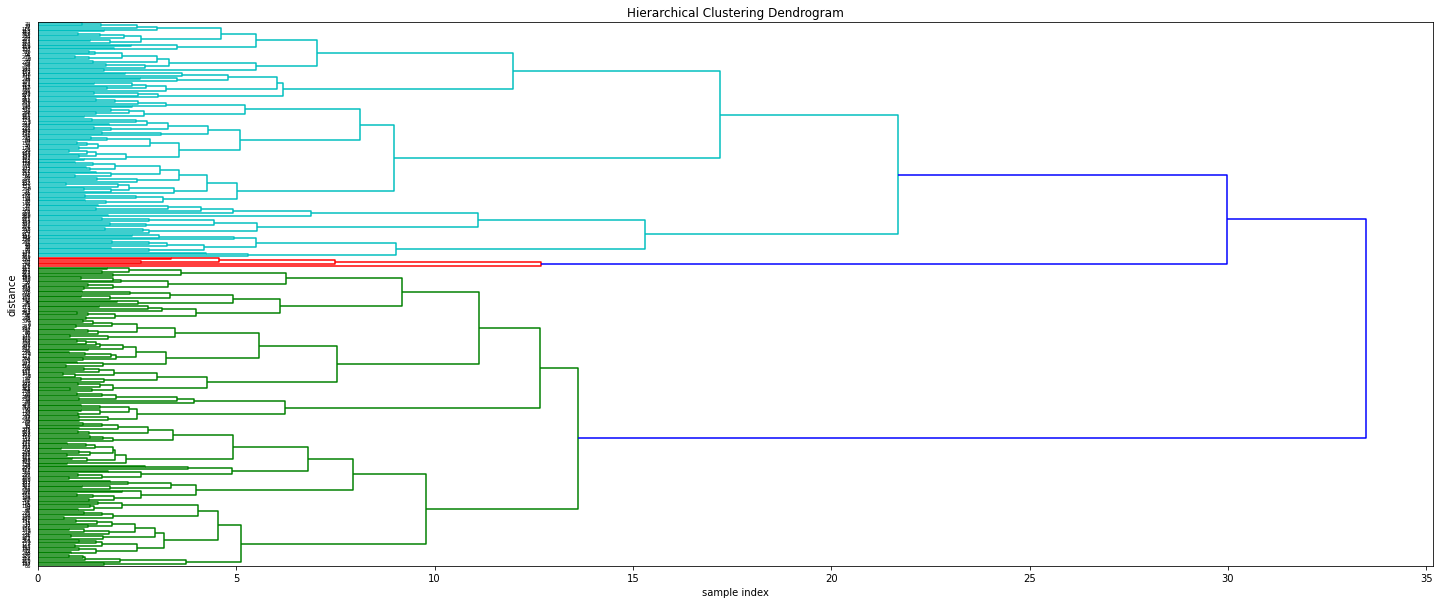

In [527]:
# Дендограмма
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    orientation='right',
    #leaf_rotation=90.,
    #leaf_font_size=70.,
)
plt.show()

In [0]:
# Метки кластеров(цветами)
# Создаю цвет для каждого кластера
# Кластеризацию с порогом отсечения 16 и датасет делется на 5 кластеров как можно заметить на дендограмме
label = fcluster(Z,16,criterion='distance')
np.unique(label)
colors=pd.cut(label, len(np.unique(label)), labels=['green', 'red', 'blue', 'black', 'pink'])

In [529]:
# Из основных отличий кластеров я заметил только то, что второй кластер выделяется численностью носиления и на карте это самые крупные города
data.loc[:, 'label'] = label
for i in data.groupby('label'):
  print('='*30)
  print('cluster {}'.format(i))

data.drop('label', axis='columns', inplace=True)

cluster (1,      Climate  HousingCost  HlthCare  Crime  ...  Recreat  Econ     Pop  label
1        575         8138      1656    886  ...     2632  4350  660328      1
2        468         7339       618    970  ...      859  5250  112402      1
5        520         5819       640    727  ...     1018  5254  135282      1
6        559         8288       621    514  ...     1117  5097  635481      1
7        537         6487       965    706  ...     1280  5795  268229      1
..       ...          ...       ...    ...  ...      ...   ...     ...    ...
324      562         8715      1805    680  ...      910  5040  402918      1
325      535         6440       317   1106  ...     2140  4986  172508      1
326      540         8371       713    440  ...      842  4946  381255      1
327      570         7021      1097    938  ...     1327  3894  531350      1
328      608         7875       212   1179  ...      918  4694  101979      1

[181 rows x 11 columns])
cluster (2,      Climate  

In [530]:
# Оценка
# Вычисляет коэфицент кореляции в иерархической кластеризации
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(data))
c

0.24236681003554678

In [531]:
# Отображение кластеризации на карте
import folium
m = folium.Map(
    location=[40.0032128, -105.3502234],
    zoom_start=5.25,
)

tooltip = 'Click me!'

for i in range(len(data2.Lat)):
  folium.Marker([data2.Lat[i], data2.Long[i]], popup='<i>'+data2.Place[i]+'\n\n'+str(data2.Climate[i])+'\n\n'+str(data2.HousingCost[i])+'\n\n'+str(data2.Pop[i])+'</i>', tooltip=tooltip, icon=folium.Icon(color=colors[i])).add_to(m)
#folium.Marker([45.3311, -121.7113], popup='<b>Timberline Lodge</b>', tooltip=tooltip).add_to(m)

m

2. DBScan

In [0]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [533]:
# модель для подсчёта minPTC до ближайшего соседа
model = NearestNeighbors(n_neighbors=2, algorithm='auto', metric='euclidean')
model.fit(X)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                 radius=1.0)

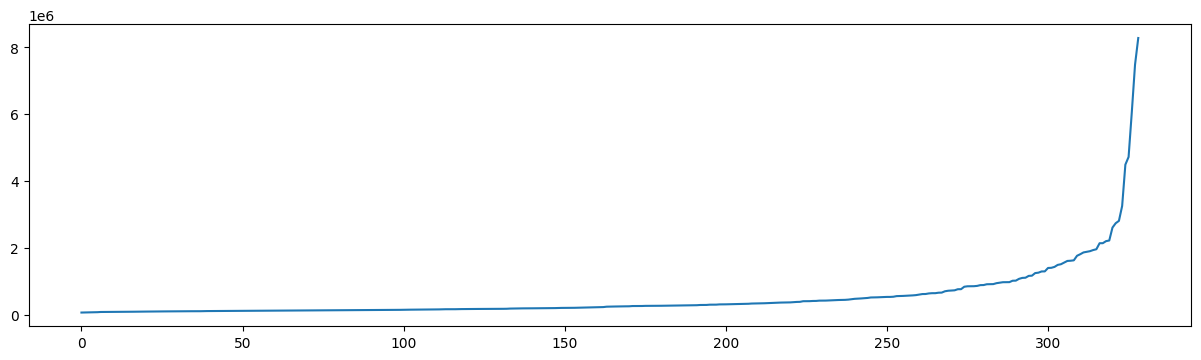

In [534]:
# Находим расстояние до ближайшего соседа
dist, _ = model.kneighbors(data, n_neighbors=3, return_distance=True)
dist.shape
dist = dist[:,-1]
dist = np.sort(dist)
fig = plt.figure(figsize=(15,4), dpi=100)
plt.plot(dist)

In [535]:
# По графику выше мы оценили эпсилон, чтобы отбросить выбросы. И кластеризируем методом дбскан
eps = 2.2
dbscan = DBSCAN(eps=eps, min_samples=2, metric='euclidean', algorithm='ball_tree')
dbscan.fit(X)

DBSCAN(algorithm='ball_tree', eps=2.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)

In [536]:
# Сохраняем метки клстеров
labels=pd.Series(dbscan.labels_)
labels.value_counts()

 0    288
-1     26
 1      4
 4      3
 6      2
 5      2
 3      2
 2      2
dtype: int64

In [0]:
# Метки кластеров(цветами)
np.unique(labels)
colors=pd.cut(labels, len(np.unique(labels)), labels=['white','green', 'orange', 'blue', 'black', 'pink', 'purple', 'red'])

In [538]:
# Отображение кластеризации на карте
import folium
m = folium.Map(
    location=[40.0032128, -105.3502234],
    zoom_start=5.25,
)

tooltip = 'Click me!'

for i in range(len(data2.Lat)):
  if labels[i] != -1:
    folium.Marker([data2.Lat[i], data2.Long[i]], popup='<i>'+data2.Place[i]+'\n\n'+str(data2.Climate[i])+'\n\n'+str(data2.HousingCost[i])+'\n\n'+str(data2.Pop[i])+'</i>', tooltip=tooltip, icon=folium.Icon(color=colors[i])).add_to(m)

m

3. K-means


In [0]:
from sklearn.cluster import KMeans

In [0]:
# Ищем наилучшее количество кластеров путем перебора нужных вариантов.
crit = []
for i in range(2, 15):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  crit.append(kmeans.inertia_)

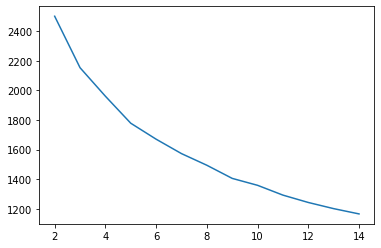

In [541]:
plt.plot(range(2,15),crit)

In [542]:
# 8-9 как раз находятся примерно на перегибе и будет использовано для кластеризации ниже
kmeans = KMeans(n_clusters=8, init='k-means++', n_init=10, random_state=1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [543]:
# Метки класстеров
labels=pd.Series(kmeans.labels_)
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [0]:
# Метки в цыетные отображеня
np.unique(labels)
colors=pd.cut(labels, len(np.unique(labels)), labels=['green', 'blue', 'black', 'red', 'pink', 'gray', 'purple', 'lightred'])

In [545]:
# Отображение кластеризации на карте
import folium
m = folium.Map(
    location=[40.0032128, -105.3502234],
    zoom_start=5.25,
)

tooltip = 'Click me!'

for i in range(len(data2.Lat)):
  folium.Marker([data2.Lat[i], data2.Long[i]], popup='<i>'+data2.Place[i]+'\n\n'+str(data2.Climate[i])+'\n\n'+str(data2.HousingCost[i])+'\n\n'+str(data2.Pop[i])+'</i>', tooltip=tooltip, icon=folium.Icon(color=colors[i])).add_to(m)

m

4. PAM

In [546]:
# Матрица расстояний
metric = pd.DataFrame(sp.spatial.distance.squareform(sp.spatial.distance.pdist(X)))
metric

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328
0,0.000000,4.132225,2.713305,3.841690,4.123168,2.686657,3.234444,2.155768,3.506389,1.777777,6.409207,4.485573,4.200918,3.501727,4.916621,3.396674,3.091306,3.194254,2.932990,5.607592,3.921248,2.892498,3.653805,2.109139,2.575475,6.686824,2.995941,2.652375,3.573508,2.310921,4.748833,4.469236,3.937657,5.831759,2.732285,2.326736,2.840385,3.408106,3.884610,3.306812,...,8.108865,3.510004,4.256553,3.235512,4.458926,4.976548,2.407760,3.673500,3.288387,3.073551,3.621523,2.455073,3.642340,3.409381,2.044525,2.918922,2.075779,2.837082,3.730468,3.962987,2.016988,2.715915,3.430734,1.906032,8.910374,3.048565,3.643470,3.917893,4.589120,3.507001,1.985792,1.533912,4.451600,2.653923,3.224256,3.650819,2.799403,3.367899,3.713954,3.375205
1,4.132225,0.000000,3.468289,3.981784,3.128519,3.783750,3.665375,3.062188,3.183779,3.350772,5.029082,5.020234,3.408914,3.622281,3.484742,3.175836,2.944992,2.980857,3.395394,4.809630,5.192510,3.495743,2.142299,4.342020,3.331434,5.283201,2.642974,3.748511,2.167205,3.448803,3.091795,2.854481,2.872231,5.291424,3.261256,2.922162,3.083680,2.438228,4.576914,3.128986,...,7.288194,3.730113,3.678300,2.953969,2.786674,2.992974,3.098189,4.095719,3.284628,4.017162,1.709341,2.789469,3.595017,2.482694,2.938845,2.725264,4.974426,3.109772,3.142032,2.818155,4.804138,2.448732,2.796005,3.889836,7.654043,3.760352,2.988812,3.460768,5.383116,3.779986,3.168636,4.068185,3.753643,2.943872,2.976686,3.754413,2.330939,3.767857,2.659958,3.373877
2,2.713305,3.468289,0.000000,4.515827,4.691854,1.660131,2.533036,2.458048,2.523212,2.461022,6.593199,5.032005,1.988734,1.708518,4.346331,1.786889,2.532943,3.301378,1.458484,6.255772,4.952668,1.821086,2.520483,3.036994,2.370266,7.083323,3.072133,2.405259,2.235519,1.930195,3.018483,4.167319,2.005221,5.835041,3.410056,1.992024,2.969357,2.952724,3.573113,2.211387,...,7.749881,2.566215,2.444969,2.819050,4.684475,5.176434,2.825980,4.824820,2.393599,1.443415,3.065998,2.223250,3.869147,3.845187,2.867874,1.725569,3.056509,2.839520,3.642581,3.066555,2.610123,2.021173,2.943162,1.722439,9.267616,2.144941,2.393857,2.559922,5.906871,2.520571,2.166462,1.750379,2.694219,3.236179,2.938860,3.029572,2.007907,2.034845,2.236479,1.579166
3,3.841690,3.981784,4.515827,0.000000,3.417065,3.892444,3.267282,2.386296,3.671424,3.194726,6.084829,5.456909,5.112884,4.538950,3.665461,5.336207,3.458481,2.864788,4.690577,3.916165,5.574304,3.812141,4.510986,3.307750,4.580974,4.660061,2.303577,4.540580,4.152268,4.255616,4.894412,4.843561,4.929636,4.224380,2.144241,4.420280,2.367657,3.012308,4.183228,4.296938,...,7.526479,3.574163,5.092295,5.132183,2.290631,5.456120,3.056432,3.669573,3.512525,4.225495,2.687515,2.756078,2.855686,4.184432,3.751277,4.084876,3.480985,2.773766,4.732363,5.007101,4.831956,3.640828,5.476257,3.927691,6.512525,3.847615,3.545476,3.947782,5.106509,3.906530,3.033020,4.288643,4.321068,2.607031,4.404578,2.804479,4.337428,4.015357,3.677050,5.179242
4,4.123168,3.128519,4.691854,3.417065,0.000000,4.642250,4.495668,3.411059,4.667239,3.059753,4.794736,5.274837,5.184126,4.615682,3.358408,4.732230,4.391608,3.344578,4.576661,3.258494,3.749183,4.211518,4.252273,4.041251,3.310175,3.438653,3.364287,3.874136,3.728207,3.913892,5.388915,3.763009,4.289561,4.725150,3.117020,4.166637,3.757598,2.591128,5.807480,4.534420,...,7.243953,4.556558,5.644612,3.723240,2.875755,3.396048,3.104563,2.883578,4.314187,4.997583,2.500512,3.068432,2.368007,2.166086,3.187807,4.056276,4.455022,4.066473,3.550513,4.332603,5.168680,2.955106,4.368234,4.188915,6.488839,4.297113,4.466529,5.223582,3.616313,5.097366,3.072359,4.320385,5.237029,2.115191,2.996828,3.963373,3.640492,5.063514,3.777978,4.560347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [0]:
# Из-за использование случайного метроидаграфик дерганный. Количество кластеров выбираю 10
crit = []
for i in range(2, 100):
  total_score, list_medoids, total_labels = PAM(data, i, metric, 10)
  crit.append(total_score)

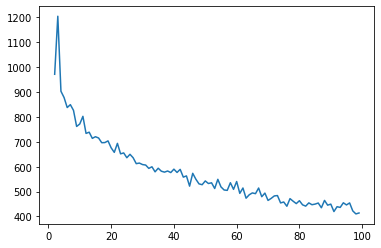

In [548]:
plt.plot(range(2,100),crit)

In [549]:
total_score, list_medoids, labels = PAM(data=data, k=10, metric=metric, max_iter=100)
print(total_score)
print(labels)
print(list_medoids)

800.3938996917184
[111, 155, 111, 158, 37, 156, 158, 285, 158, 285, 270, 50, 177, 156, 37, 50, 111, 155, 111, 37, 111, 37, 177, 111, 37, 37, 158, 37, 285, 50, 177, 155, 177, 270, 285, 111, 158, 37, 158, 111, 285, 285, 270, 155, 111, 111, 111, 270, 111, 37, 50, 111, 37, 111, 158, 285, 111, 285, 285, 37, 285, 37, 158, 177, 270, 285, 37, 111, 37, 111, 37, 37, 285, 37, 111, 158, 37, 270, 156, 158, 37, 50, 285, 37, 285, 37, 50, 158, 158, 285, 158, 37, 177, 158, 111, 285, 155, 285, 285, 158, 37, 177, 156, 37, 156, 37, 50, 37, 111, 111, 111, 111, 285, 37, 50, 156, 37, 155, 285, 111, 158, 285, 158, 111, 111, 37, 37, 158, 177, 37, 37, 156, 272, 50, 37, 177, 111, 37, 111, 285, 37, 285, 111, 177, 37, 155, 158, 158, 156, 285, 111, 37, 37, 158, 111, 155, 156, 158, 158, 111, 50, 111, 50, 158, 285, 285, 37, 50, 177, 111, 50, 177, 37, 285, 158, 37, 111, 177, 270, 37, 111, 37, 285, 111, 158, 111, 285, 111, 177, 111, 37, 37, 37, 111, 111, 37, 37, 37, 177, 155, 50, 177, 158, 50, 111, 37, 270, 177, 111, 3

In [0]:
# Метки -> в цвета
len(np.unique(labels))
colors=pd.cut(labels, len(np.unique(labels)), labels=['green', 'blue', 'black', 'red', 'pink', 'gray', 'purple', 'lightred', 'orange', 'darkblue'])

In [551]:
# Отображение кластеризации на карте
import folium
m = folium.Map(
    location=[40.0032128, -105.3502234],
    zoom_start=5.25,
)

tooltip = 'Click me!'

for i in range(len(data2.Lat)):
  folium.Marker([data2.Lat[i], data2.Long[i]], popup='<i>'+data2.Place[i]+'\n\n'+str(data2.Climate[i])+'\n\n'+str(data2.HousingCost[i])+'\n\n'+str(data2.Pop[i])+'</i>', tooltip=tooltip, icon=folium.Icon(color=colors[i])).add_to(m)

m

6. Оценить получившиеся разбиения

For n_clusters = 2 The average silhouette_score is : 0.38634034734872624
For n_clusters = 3 The average silhouette_score is : 0.2344298915071524
For n_clusters = 4 The average silhouette_score is : 0.1720762941449626
For n_clusters = 5 The average silhouette_score is : 0.1873672919638168
For n_clusters = 6 The average silhouette_score is : 0.1439856664650449
For n_clusters = 7 The average silhouette_score is : 0.14280720818304365
For n_clusters = 8 The average silhouette_score is : 0.14218356024207662
For n_clusters = 9 The average silhouette_score is : 0.14200899729843636
For n_clusters = 10 The average silhouette_score is : 0.12655284352167506


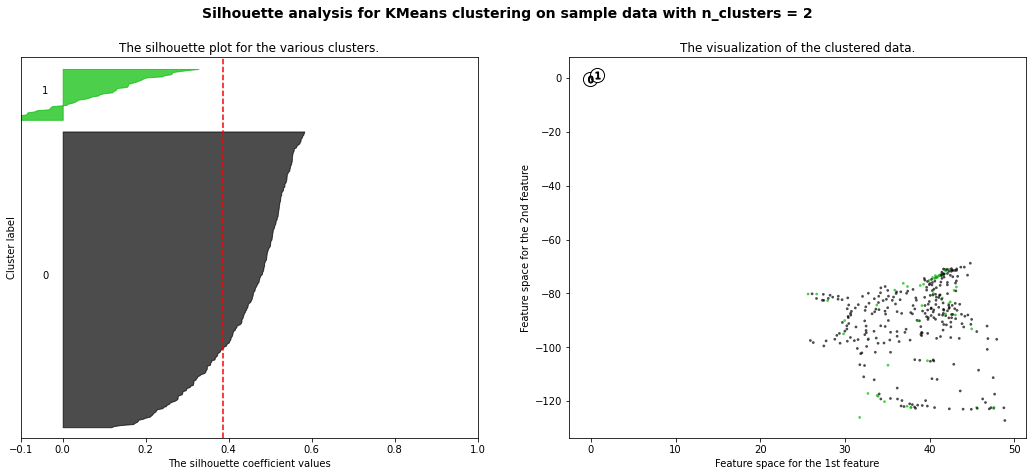

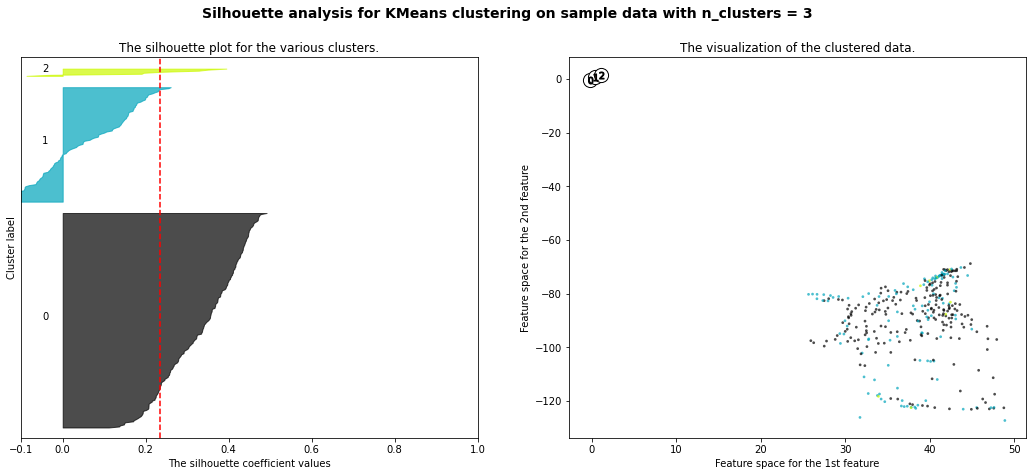

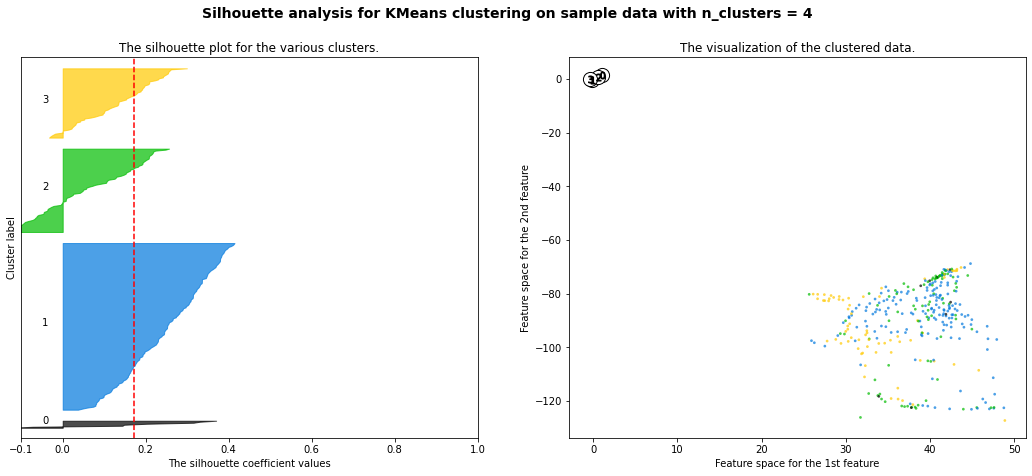

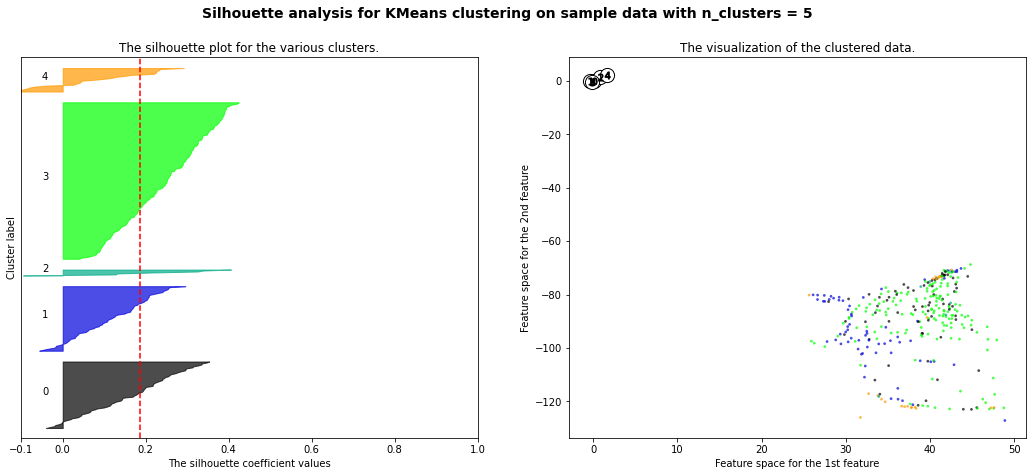

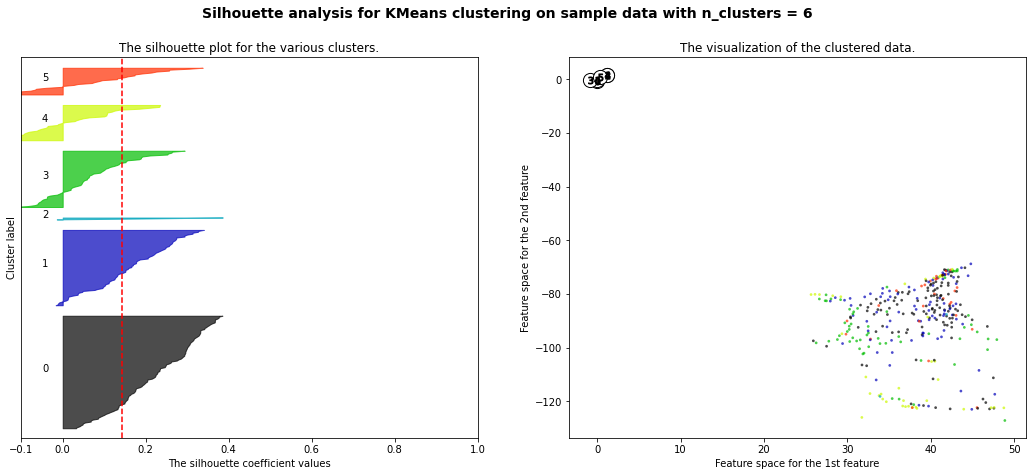

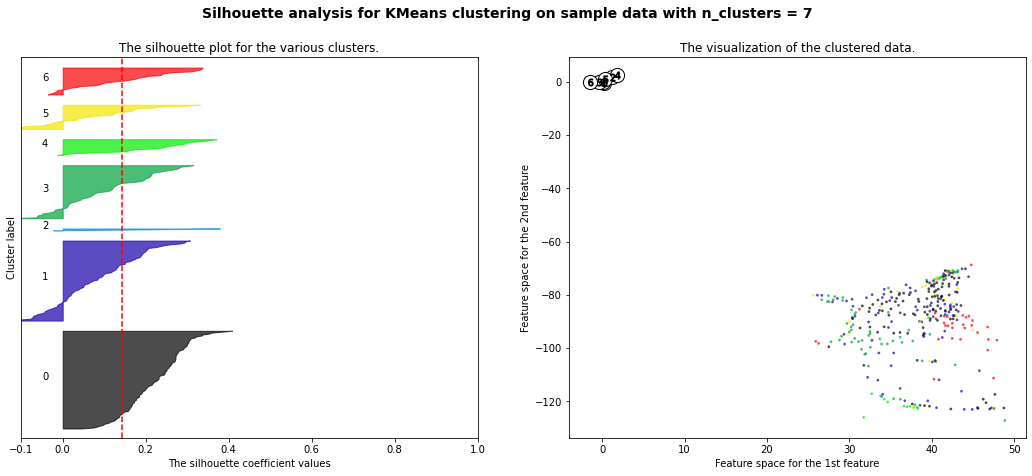

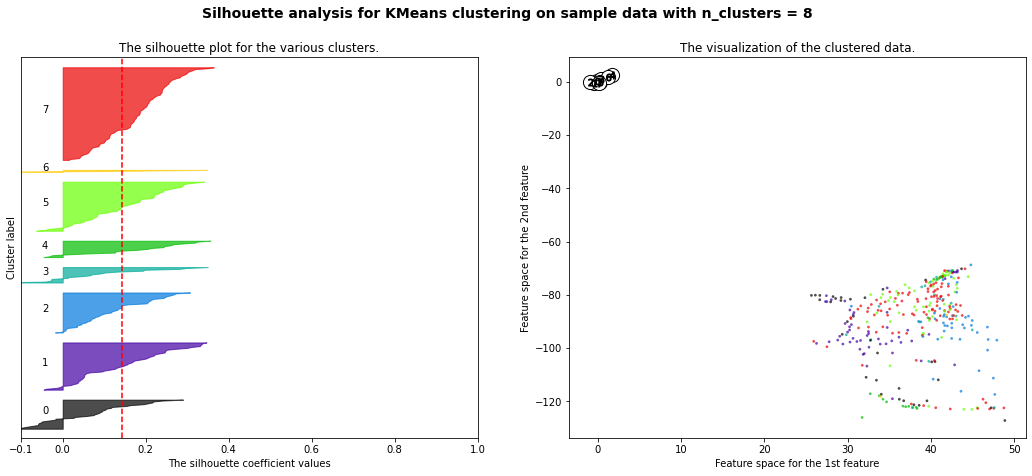

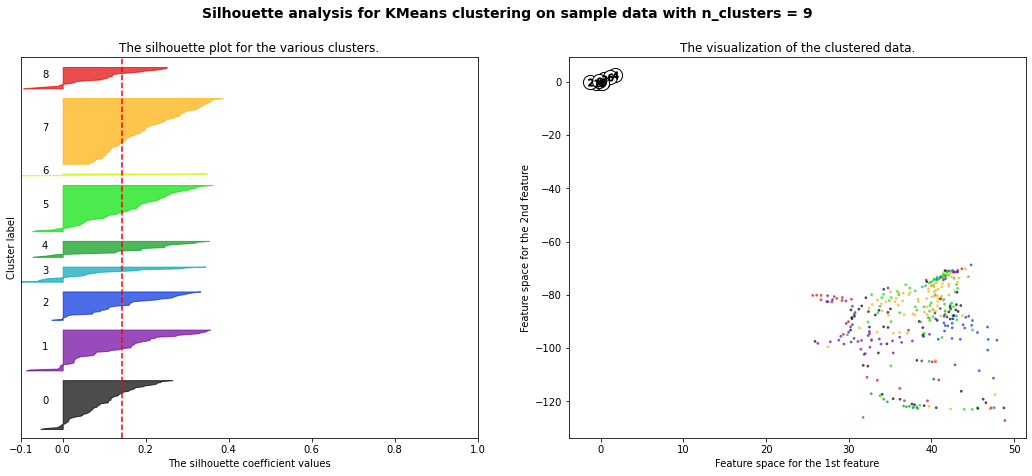

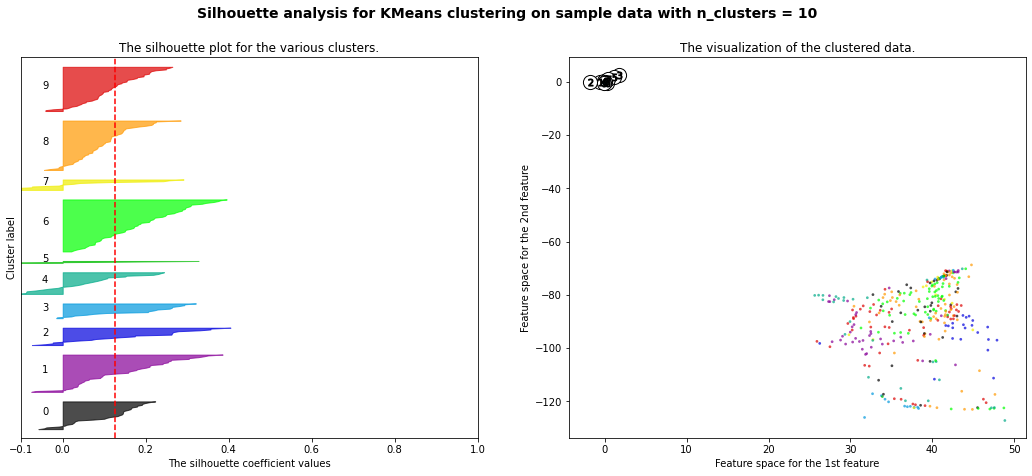

In [552]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))


        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")


    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data2.Lat, data2.Long, marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Метод показал, что чем меньше класстеров, тем лучше)))))) 5 выглядит достаточно хорошей, да и 8 тоже
Другие методы были немного проанализированны выше.

7. Какой метод лучше?
Конечно же мой PAM ЛУЧШЕ Всех делает разбиение на кластеры(к сожалению нет). Также на мой взгляд иерархический метод показал себя неплохо, если смотреть по карте, то прям видно некоторые очертания каждого кластера.

Итерпретация Иерархического метода.
Второй кластер(цвет-red) выделяется очень большой численностью населения \

Пятый кластер(цвет-pink) выделяется очень большим покзателем Экономики\

Первый и четверты (цвета-green,black) особо ничем не отличаются. имеют средние или низкие значения\

Третий кластер (цвет-blue) тоже средний, но все показаетли на порядок(на несколько тысяч или сотен(в зависимости от критерия))

8. Отобразить на карте и оценить географическую зависимость.
Карты есть для каждого метода.
Сложно судить есть ли какая-либо географическая зависимость, однако на иерархической кластеризации она прослеживается. И выделяются отдельные штаты, хоть и есть одно смешенное пятно из двух огромных кластеров в самой населенной части США(Бостон, Нью-Йорк, и т.д)
Однако другие подобной зависимости почти не показали. Также может казаться, что на карте есть сильные выбросы, но я так понимаю это не так, потому что мы оценивали ни по местоположению, а по характеристикам, таким как цена жилья, население, преступность, климот и т.д Наверняка могут быть заметные географические кластеры с похожим климотом(так как в одном штате или в соседнем)
Также более населённые территории пестрят маркерами очень крупных и перенаселленных штаты и города, которые на карте будут отображать одним класстером.
Итог.
Прямой географической зависимости нет, но через столбы с данными климата или населения или ещё чего прослеживается некоторая зависимость.
